In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 30

Let's start by looking at some correlations in Covid-19 data.


In [2]:
covid_table = Table.read_table("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table

date,state,fips,cases,deaths
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0
2020-01-26,California,6,2,0


In [3]:
case_table = covid_table.pivot('state', 'date', values='cases', collect=sum)
case_table = case_table.where('date', are.above_or_equal_to('2020-03-30'))
case_table = case_table.where('date', are.below_or_equal_to('2021-04-30'))
case_table

date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-03-30,947,120,1169,508,7421,2628,2571,264,401,5695,3032,60,204,415,5070,1797,424,374,480,4024,275,1415,5752,6508,576,848,1049,177,185,1044,314,16636,282,67504,1303,109,2,1933,481,607,4156,174,408,925,100,1721,3065,806,256,30,1020,5180,145,1269,96
2020-03-31,999,133,1298,564,8583,2990,3128,319,495,6742,4116,139,224,526,5992,2177,498,435,590,5237,303,1662,6620,7629,629,937,1350,198,199,1113,367,18696,315,76211,1527,126,2,2199,566,690,4997,239,488,1083,107,2049,3588,887,293,30,1249,5293,162,1351,121
2020-04-01,1108,143,1413,624,9857,3346,3557,368,586,7769,4747,147,258,669,6978,2578,549,489,674,6424,344,1985,7738,9292,689,1073,1580,219,249,1279,415,22255,363,84364,1591,147,6,2548,719,737,5805,286,566,1293,129,2689,4402,1012,321,30,1511,5589,191,1552,138
2020-04-02,1270,146,1600,683,11190,3728,3824,393,653,9000,5444,152,283,891,7695,3056,614,554,747,9152,376,2331,8966,10791,742,1177,1834,241,273,1458,479,25590,403,93360,1858,159,8,2903,879,827,7021,316,657,1554,165,2868,4952,1077,338,37,1706,6586,217,1730,154
2020-04-03,1535,156,1769,738,12569,4182,4915,450,757,10260,5967,154,317,1012,8904,3455,699,625,762,10299,432,2758,10402,12669,789,1358,2113,262,297,1549,540,29895,495,103689,2093,173,8,3312,989,899,8420,378,711,1700,187,3032,5773,1248,389,38,2011,6967,242,1916,167
2020-04-04,1632,169,2019,743,13796,4574,5276,593,902,11537,6383,223,349,1076,10357,3975,786,702,909,12500,456,3125,11736,14225,865,1455,2291,281,339,1758,621,34124,544,115963,2402,186,8,3739,1159,1000,10110,452,806,1917,212,3265,6566,1426,461,42,2408,7499,282,2112,189
2020-04-05,1840,183,2269,853,15202,4950,5675,673,998,12342,6742,265,369,1100,11276,4437,868,769,1048,13014,470,3609,12500,15633,935,1638,2367,298,377,1880,669,37505,624,124085,2585,207,8,4043,1251,1068,11590,475,922,2049,240,3538,7117,1618,512,42,2636,7985,325,2267,200
2020-04-06,2005,189,2466,927,16361,5172,6906,783,1097,13621,7558,266,385,1170,12262,4986,946,854,1057,14867,499,4045,13837,17129,986,1738,2722,319,438,1971,715,41090,686,133389,2870,225,8,4450,1326,1132,13075,513,1082,2232,288,3753,8150,1662,543,44,2877,8385,347,2440,213
2020-04-07,2197,211,2577,997,17540,5429,7781,928,1211,14739,9156,274,408,1210,13549,5544,1048,905,1289,16284,519,4371,15202,18851,1069,1915,3037,319,491,2101,747,44416,794,141703,3220,237,8,4783,1470,1181,14582,573,1229,2417,320,4010,8968,1737,575,45,3332,8683,413,2578,221
2020-04-08,2498,224,2726,1077,19043,5655,8781,1116,1440,15690,10204,409,433,1232,15078,5986,1145,1055,1393,17030,537,5529,16790,20220,1154,2003,3327,332,538,2318,788,47437,865,151271,3423,251,11,5149,1523,1239,16414,620,1450,2552,393,4246,9897,1860,605,46,3644,9098,483,2756,230


Now construct a table of *new* cases by day

In [4]:
states = case_table.labels[1:]
dates = case_table['date'][1:]
new_cases = Table().with_column('date', dates)
for s in states:
    cases = case_table.column(s)
    new = np.diff(cases)
    new_cases = new_cases.with_column(s, new)
    
for territory in ['Guam', 'District of Columbia', 'Northern Mariana Islands', 'Virgin Islands', 'Puerto Rico']:
    new_cases = new_cases.drop(territory)

new_cases


date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-03-31,52,13,129,56,1162,362,557,55,1047,1084,20,111,922,380,74,61,110,1213,28,247,868,1121,53,89,301,21,14,69,53,2060,33,8707,224,17,266,85,83,841,80,158,7,328,523,81,37,229,113,17,82,25
2020-04-01,109,10,115,60,1274,356,429,49,1027,631,34,143,986,401,51,54,84,1187,41,323,1118,1663,60,136,230,21,50,166,48,3559,48,8153,64,21,349,153,47,808,78,210,22,640,814,125,28,262,296,29,201,17
2020-04-02,162,3,187,59,1333,382,267,25,1231,697,25,222,717,478,65,65,73,2728,32,346,1228,1499,53,104,254,22,24,179,64,3335,40,8996,267,12,355,160,90,1216,91,261,36,179,550,65,17,195,997,26,178,16
2020-04-03,265,10,169,55,1379,454,1091,57,1260,523,34,121,1209,399,85,71,15,1147,56,427,1436,1878,47,181,279,21,24,91,61,4305,92,10329,235,14,409,110,72,1399,54,146,22,164,821,171,51,305,381,25,186,13
2020-04-04,97,13,250,5,1227,392,361,143,1277,416,32,64,1453,520,87,77,147,2201,24,367,1334,1556,76,97,178,19,42,209,81,4229,49,12274,309,13,427,170,101,1690,95,217,25,233,793,178,72,397,532,40,196,22
2020-04-05,208,14,250,110,1406,376,399,80,805,359,20,24,919,462,82,67,139,514,14,484,764,1408,70,183,76,17,38,122,48,3381,80,8122,183,21,304,92,68,1480,116,132,28,273,551,192,51,228,486,43,155,11
2020-04-06,165,6,197,74,1159,222,1231,110,1279,816,16,70,986,549,78,85,9,1853,29,436,1337,1496,51,100,355,21,61,91,46,3585,62,9304,285,18,407,75,64,1485,160,183,48,215,1033,44,31,241,400,22,173,13
2020-04-07,192,22,111,70,1179,257,875,145,1118,1598,23,40,1287,558,102,51,232,1417,20,326,1365,1722,83,177,315,0,53,130,32,3326,108,8314,350,12,333,144,49,1507,147,185,32,257,818,75,32,455,298,66,138,8
2020-04-08,301,13,149,80,1503,226,1000,188,951,1048,25,22,1529,442,97,150,104,746,18,1158,1588,1369,85,88,290,13,47,217,41,3021,71,9568,203,14,366,53,58,1832,221,135,73,236,929,123,30,312,415,70,178,9
2020-04-09,340,9,292,69,1148,547,1003,93,1129,681,7,134,1344,414,125,61,132,1253,23,656,2151,1155,88,257,212,22,56,138,31,3590,124,10765,228,18,364,160,82,1965,277,240,54,210,1475,120,23,397,511,41,129,73


In [5]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x)  

def correlation(t, label_x, label_y):
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    return np.mean(x_in_standard_units * y_in_standard_units)

# In this version we exclude "outliers" defined by a number of standard deviations above 0
def robust_correlation(t, label_x, label_y):
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    not_outliers = (x_in_standard_units < 2.5) & (y_in_standard_units < 2.5)
    return np.mean(x_in_standard_units[not_outliers] * y_in_standard_units[not_outliers])

Now, we compute the correlations for all pairs of states.

In [6]:
states = new_cases.labels[1:]
r_table = Table().with_columns('state1', '', 'state2', '', 'correlation', 0, 'robust correlation', 0).where([False])
for s1 in states:
    for s2 in states:
        if s1 < s2:
            r = correlation(new_cases, s1, s2)
            rr = robust_correlation(new_cases, s1, s2)
            this_table = Table().with_columns('state1', s1, 'state2', s2, 'correlation', r, 'robust correlation', rr)
            r_table.append(this_table)

In [7]:
r_table.sort('robust correlation', descending=True).show(20)

state1,state2,correlation,robust correlation
Kentucky,West Virginia,0.832724,0.671047
Maryland,West Virginia,0.896208,0.665833
Pennsylvania,West Virginia,0.897153,0.662036
Ohio,West Virginia,0.804263,0.647928
Massachusetts,New York,0.807749,0.644825
New York,Vermont,0.74405,0.643296
Maryland,Pennsylvania,0.887669,0.637883
Colorado,Indiana,0.914271,0.637595
Indiana,Nevada,0.882906,0.628634
Indiana,New Mexico,0.92862,0.627323


![us-map.png](us-map.png)

In [8]:
r_table.sort('robust correlation', descending=False).show(20)

state1,state2,correlation,robust correlation
New York,North Dakota,-0.0521865,-0.0413556
North Dakota,Vermont,0.0264664,0.00666296
New Jersey,North Dakota,0.0586008,0.0299273
Connecticut,Hawaii,0.062657,0.0313505
Kansas,New Jersey,0.231014,0.0319358
Hawaii,Rhode Island,0.0485169,0.041818
Kansas,New York,0.246583,0.0465524
Florida,North Dakota,0.0758197,0.0579598
North Dakota,South Carolina,0.0306319,0.0588733
Louisiana,Michigan,0.150952,0.0606439


In [9]:
def r_table(r, num_points=1000):
    """
    Generate a table of N data points with a correlation approximately r
    """
    np.random.seed(8)
    x = np.random.normal(0, 1, num_points)
    z = np.random.normal(0, 1, num_points)
    y = r*x + (np.sqrt(1-r**2))*z
    return Table().with_columns('x', x, 'y', y)

In [10]:
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)

In [11]:
def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)

In [12]:
# Example dataset with high correlation
example = r_table(0.9)
example

x,y
0.0912047,-0.407068
1.09128,0.869481
-1.94697,-1.61527
-1.38635,-1.16818
-2.29649,-1.68308
2.40983,2.8194
1.72784,1.71057
2.20456,3.25342
0.794828,0.688676
0.976421,1.54228


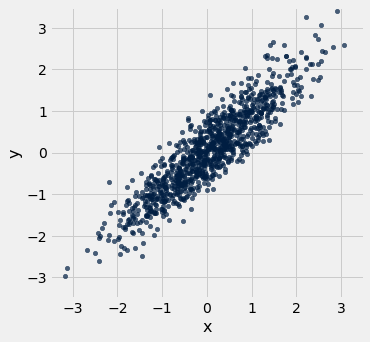

In [13]:
example.scatter('x', 'y')
resize_window()

In [14]:
#Function to predict values of y for a given x
def predict_y(x_val):
    """
    Predicts y-values for the example table 
    """
    nearby_points = example.where('x', are.between(x_val-0.25, x_val + 0.25))
    return np.mean(nearby_points.column('y'))

In [15]:
example = example.with_column('Predicted y', example.apply(predict_y, 'x'))

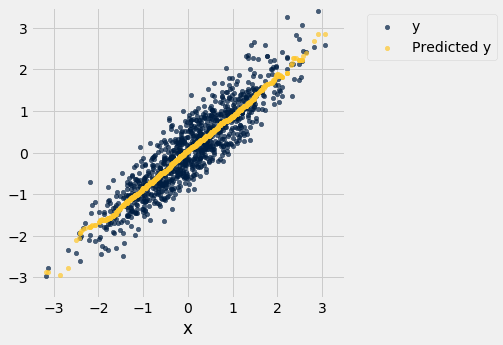

In [16]:
#Visualize predicted values
example.scatter('x')
resize_window()

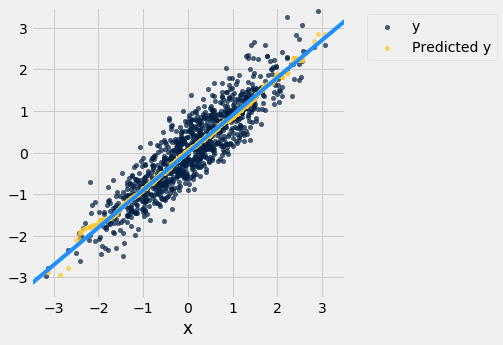

In [17]:
#Blue line matches our predicted points
example.scatter('x')
draw_line(slope=.9, intercept=0, color='dodgerblue')
resize_window()

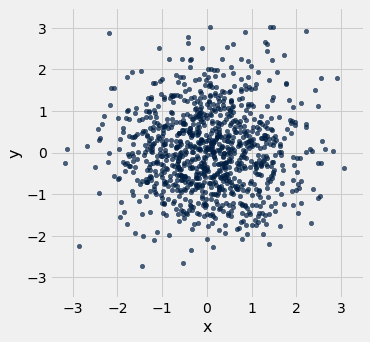

In [18]:
#Example with correlation of 0
example = r_table(0)
example.scatter('x', 'y')
resize_window()

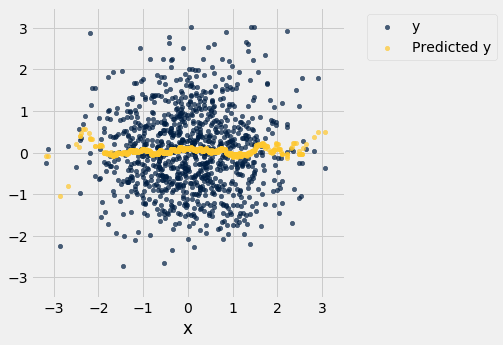

In [19]:
#Predictions produce approximately horizontal line
example = example.with_column('Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
resize_window()

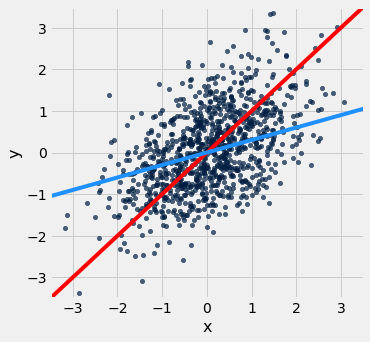

In [20]:
#Example with correlation of 0.5
### which line follows the pattern?
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_line(slope=1, intercept=0)
draw_line(slope=0.3, intercept=0, color='dodgerblue')

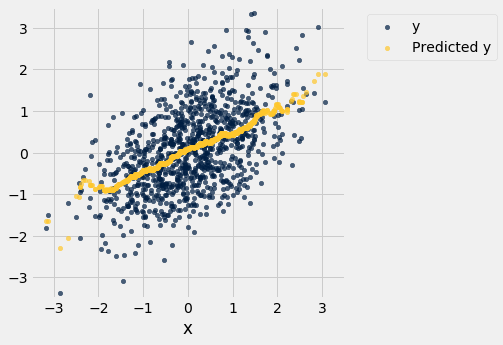

In [21]:
#Nearest neighbors predictions
example = example.with_column('Predicted y', example.apply(predict_y, 'x'))
example.scatter('x')
resize_window()

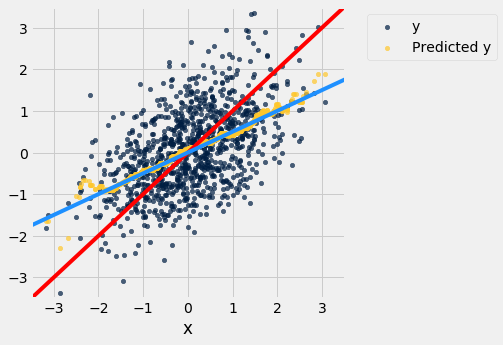

In [22]:
#Blue line matches our predictions well
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0, color='dodgerblue')
resize_window()

In [23]:
################################################
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd


def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [24]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [25]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.25 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [26]:
heights_with_predictions = heights.with_column(
    'Average neighbor prediction', heights.apply(predict_child, 'MidParent'))

In [27]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [28]:
heights.take(123)

MidParent,Child
69.48,71.5


In [29]:
galton_slope*heights.take(123)[0] + galton_intercept

array([66.92007567])

In [30]:
heights_with_predictions.where('MidParent', are.equal_to(69.48))

MidParent,Child,Average neighbor prediction
69.48,64,66.7588
69.48,74,66.7588
69.48,72,66.7588
69.48,69,66.7588
69.48,67.5,66.7588
69.48,63.5,66.7588
69.48,72,66.7588
69.48,71.5,66.7588
69.48,71.5,66.7588
69.48,70,66.7588


In [31]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

MidParent,Child,Average neighbor prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


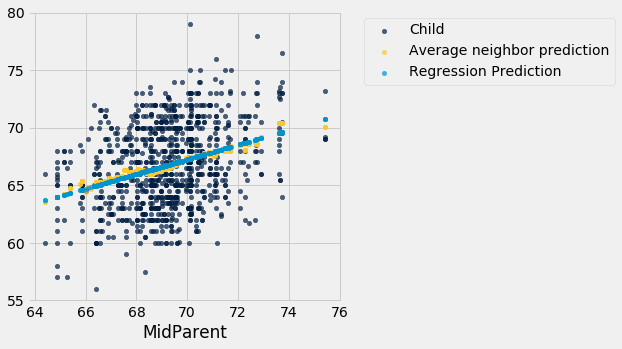

In [32]:
heights_with_predictions.scatter('MidParent')

In [33]:
demographics = Table.read_table('district_demographics2016.csv')
demographics

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3
Alabama,"Congressional District 6 (115th Congress), Alabama",61413,26.1,36.7
Alabama,"Congressional District 7 (115th Congress), Alabama",34664,69.8,19.4
Alaska,"Congressional District (at Large) (115th Congress), Alaska",76440,37.6,29.6
Arizona,"Congressional District 1 (115th Congress), Arizona",50537,46.6,24.5
Arizona,"Congressional District 2 (115th Congress), Arizona",49072,49.6,34


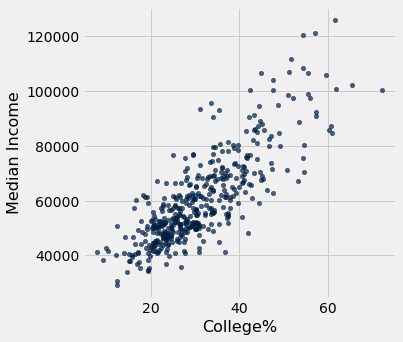

In [34]:
demographics.scatter('College%', 'Median Income')

In [35]:
demographics_slope = slope(demographics, 'College%', 'Median Income')
demographics_intercept = intercept(demographics, 'College%', 'Median Income')
(demographics_slope, demographics_intercept)

(1270.70168946388, 20802.577766677925)

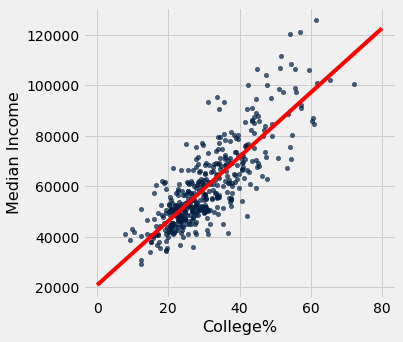

In [36]:
demographics.scatter('College%', 'Median Income')
draw_line(slope=demographics_slope, intercept=demographics_intercept, x=make_array(0, 80))

Here's a thought-provoking iteractive graphic from the New York Times:


[You Draw It: How Family Income
Predicts Children’s College Chances](https://www.nytimes.com/interactive/2015/05/28/upshot/you-draw-it-how-family-income-affects-childrens-college-chances.html)

![nyt-you-draw-it.png](nyt-you-draw-it.png)
